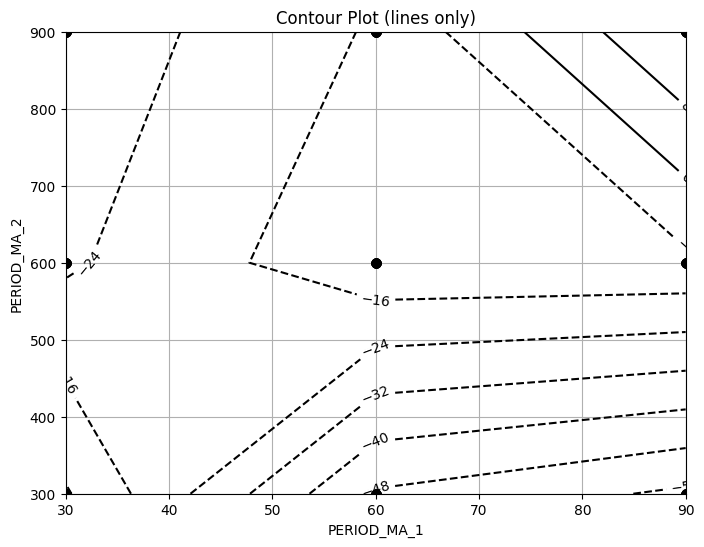

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV を読み込む（ファイル名は適宜変更）
df = pd.read_csv("../output/doe-1/7011/ticks_20251204.csv")

# 必要な列を抽出
x = df["PERIOD_MA_1"]
y = df["PERIOD_MA_2"]
z = df["total"]

# グリッド化（pivot）
pivot = df.pivot_table(
    index="PERIOD_MA_2",
    columns="PERIOD_MA_1",
    values="total"
)

X, Y = np.meshgrid(pivot.columns, pivot.index)
Z = pivot.values

# 等高線図（線のみ）
plt.figure(figsize=(8, 6))
cs = plt.contour(X, Y, Z, levels=10, colors="black")  # ← contourf ではなく contour
plt.clabel(cs, inline=True, fontsize=10)

# ✅ 元データ点を黒丸で追加
plt.scatter(x, y, color="black", s=40, zorder=3)

plt.xlabel("PERIOD_MA_1")
plt.ylabel("PERIOD_MA_2")
plt.title("Contour Plot (lines only)")
plt.grid(True)
plt.show()
